<a href="https://colab.research.google.com/github/NisthaSharma/BrainTumor/blob/main/InceptionResnetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [256, 256]

train_path = 'drive/MyDrive/Brain_tumor_detection/brain/Train'
valid_path = 'drive/MyDrive/Brain_tumor_detection/brain/Test'

In [5]:
inceptionresnetv2 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 1s 0us/step


In [6]:
for layer in inceptionresnetv2.layers:
    layer.trainable = False

In [7]:
folders = glob('drive/MyDrive/Brain_tumor_detection/brain/Train/*')

In [8]:
x = Flatten()(inceptionresnetv2.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionresnetv2.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2924 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
92/92 [==============================] - 1039s 11s/step - loss: 1.3653 - accuracy: 0.8557 - val_loss: 0.3137 - val_accuracy: 0.9550
Epoch 2/10
92/92 [==============================] - 1009s 11s/step - loss: 0.3992 - accuracy: 0.9210 - val_loss: 0.3474 - val_accuracy: 0.9450
Epoch 3/10
92/92 [==============================] - 1012s 11s/step - loss: 0.1603 - accuracy: 0.9603 - val_loss: 0.2304 - val_accuracy: 0.9350
Epoch 4/10
92/92 [==============================] - 1008s 11s/step - loss: 0.1346 - accuracy: 0.9730 - val_loss: 0.2848 - val_accuracy: 0.9500
Epoch 5/10
92/92 [==============================] - 1011s 11s/step - loss: 0.2104 - accuracy: 0.9614 - val_loss: 0.8314 - val_accuracy: 0.8700
Epoch 6/10
92/92 [==============================] - 1007s 11s/step - loss: 0.2197 - accuracy: 0.9614 - val_loss: 0.0797 - val_accuracy: 0.9850
Epoch 7/10
92/92 [==============================] - 1011s 11s/step - loss: 0.1610 - accuracy: 0.9716 - val_loss: 0.0389 - val_accuracy: 0.9950

Evaluating the InceptionResnetv2 performance

In [16]:
test_generator = test_datagen.flow_from_directory(
                                            'drive/MyDrive/Brain_tumor_detection/brain_tumor_dataset',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical'
)

Found 253 images belonging to 2 classes.


In [17]:
scores = model.evaluate_generator(test_generator,len(test_generator)) #1514 testing images
print("Accuracy = ", scores[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy =  0.9288537502288818


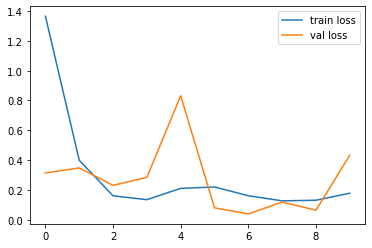

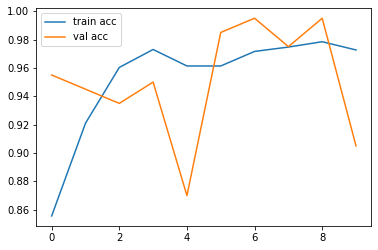

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
import tensorflow as tf

from keras.models import load_model

model.save('model_inceptionresnetv2.h5')

In [22]:

model.save('model_inceptionresnetv2')

INFO:tensorflow:Assets written to: model_inceptionresnetv2/assets


In [23]:
!zip -r ./file_inceptionresnetv2.zip ./model_inceptionresnetv2/


  adding: model_inceptionresnetv2/ (stored 0%)
  adding: model_inceptionresnetv2/variables/ (stored 0%)
  adding: model_inceptionresnetv2/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model_inceptionresnetv2/variables/variables.index (deflated 80%)
  adding: model_inceptionresnetv2/saved_model.pb (deflated 92%)
  adding: model_inceptionresnetv2/keras_metadata.pb (deflated 96%)
  adding: model_inceptionresnetv2/assets/ (stored 0%)


In [25]:
from google.colab import files
files.download("./file_inceptionresnetv2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>